##MedGemma Fine Tuning using Brain images

In [ ]:
! pip install --upgrade --quiet transformers bitsandbytes datasets evaluate peft trl scikit-learn kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.9/504.9 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.9/511.9 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 123.4 MB/s eta 0:00:00


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("orvile/brain-cancer-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-cancer-mri-dataset


In [ ]:
!pip install datasets -q

In [ ]:
from datasets import load_dataset
dataset = load_dataset("/kaggle/input/brain-cancer-mri-dataset") # load dataset makes it easier to work with it gives a dict and inside is a list, we can just say data['train]and then give

Resolving data files:   0%|          | 0/6057 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

##Start

In [7]:
import json

# Save df_glioma to a JSON file
with open('df_glioma.json', 'w') as f:
    json.dump(df_glioma, f, indent=2)

# Save df_meningioma to a JSON file
with open('df_meningioma.json', 'w') as f:
    json.dump(df_meningioma, f, indent=2)

# Save df_tumor to a JSON file
with open('df_tumor.json', 'w') as f:
    json.dump(df_tumor, f, indent=2)

print("DataFrames saved as JSON files: df_glioma.json, df_meningioma.json, df_tumor.json")

DataFrames saved as JSON files: df_glioma.json, df_meningioma.json, df_tumor.json


In [ ]:
import json
import pandas as pd

# Load data from JSON files
with open('df_glioma.json', 'r') as f:
    df_glioma_loaded = json.load(f)

with open('df_meningioma.json', 'r') as f:
    df_meningioma_loaded = json.load(f)

with open('df_tumor.json', 'r') as f:
    df_tumor_loaded = json.load(f)

# Convert loaded data (assuming it's list of dicts) to pandas DataFrames
df_glioma = pd.DataFrame(df_glioma_loaded['brain_scan_explanations'])
df_meningioma = pd.DataFrame(df_meningioma_loaded['brain_scan_explanations'])
df_tumor = pd.DataFrame(df_tumor_loaded['brain_scan_explanations'])

print("Data loaded back into DataFrames: df_glioma, df_meningioma, df_tumor")

In [ ]:
newdf_glioma = []
newdf_meningioma = []
newdf_tumor = []




def process_data(df,newdf):
    for i in range(len(df['brain_scan_explanations'])):
      label = df['brain_scan_explanations'][i]['topic']
      one_line_summary = df['brain_scan_explanations'][i]['response']['finding']
      next_steps = df['brain_scan_explanations'][i]['response']['appointment_topics']['items']
      followup_qs = df['brain_scan_explanations'][i]['response']['doctor_questions']['items']
      close_statment = df['brain_scan_explanations'][i]['response']['closing_statement']
      user_q = df['brain_scan_explanations'][i]['instruction']
      more_details = df['brain_scan_explanations'][i]['response']['explanation_and_statistic']
      newdf.append({
          'label': label,
          'one_line_summary': one_line_summary,
          'next_steps': next_steps,
          'followup_qs': followup_qs,
          'close_statment': close_statment,
          'user_qs': user_q,
          'more_details': more_details
      })


process_data(df_glioma,newdf_glioma)
process_data(df_meningioma,newdf_meningioma)
process_data(df_tumor,newdf_tumor)


# newdf_glioma = pd.DataFrame()
# newdf_meningioma = pd.DataFrame()
# newdf_tumor = pd.DataFrame()

In [ ]:
import pandas as pd
newdf_glioma = pd.DataFrame(newdf_glioma)
newdf_meningioma = pd.DataFrame(newdf_meningioma)
newdf_tumor = pd.DataFrame(newdf_tumor)

In [ ]:
# Create a list containing the DataFrames in the order you want to stack them
dataframes_to_combine = [newdf_glioma, newdf_meningioma, newdf_tumor]

# Use pd.concat to stack them vertically
combined_df = pd.concat(dataframes_to_combine, ignore_index=True)

# Display the shape or head of the new combined DataFrame to verify
print("Shape of the combined DataFrame:", combined_df.shape)
print(combined_df.head())

Shape of the combined DataFrame: (273, 7)
          label                                   one_line_summary  \
0  brain_glioma  The analysis of your scan reveals an area with...   
1  brain_glioma  The scan shows what appears to be an infiltrat...   
2  brain_glioma  The analysis identified a mass with surroundin...   
3  brain_glioma  Your scan highlights a non-specific abnormalit...   
4  brain_glioma  The scan revealed a faint area of high signal,...   

                                          next_steps  \
0  [A consultation with a neurosurgeon to discuss...   
1  [The extent of the area involved and what it m...   
2  [Starting medication to manage the swelling., ...   
3  [Follow-up imaging, perhaps with contrast or d...   
4  [A strategy of active surveillance with period...   

                                         followup_qs  \
0  [What is the primary goal of the recommended n...   
1  [How does the 'infiltrative' nature of this af...   
2  [How soon can we start addres

In [ ]:
combined_df.shape

(273, 7)

In [ ]:
dataset['train'].features

{'image': Image(mode=None, decode=True),
 'label': ClassLabel(names=['brain_glioma', 'brain_menin', 'brain_tumor'])}

In [ ]:

# ['brain_glioma', 'brain_menin', 'brain_tumor']
#  0                    1               2


label_map = {
    'brain_glioma': 0,
    'brain_meningioma': 1,
    'brain_tumor': 2
}

# 3. Apply the map to the 'label' column
# This replaces each number with its corresponding string from the dictionary
combined_df['label'] = combined_df['label'].map(label_map)


In [ ]:
combined_df

,label,one_line_summary,next_steps,followup_qs,close_statment,user_qs,more_details
0,0,The analysis of your scan reveals an area with...,[A consultation with a neurosurgeon to discuss...,[What is the primary goal of the recommended n...,Receiving this information is the first step t...,Explain my brain scan. It mentions findings 'h...,A glioma is a tumor that originates from the g...
1,0,The scan shows what appears to be an infiltrat...,[The extent of the area involved and what it m...,[How does the 'infiltrative' nature of this af...,Understanding the specific features of this fi...,My report says there's an 'infiltrative lesion...,The term 'infiltrative' means the cells appear...
2,0,The analysis identified a mass with surroundin...,"[Starting medication to manage the swelling., ...",[How soon can we start addressing the swelling...,Your scan has provided clear information for y...,There's a note on my scan about a 'mass with s...,"A mass is a growth of cells, and the swelling ..."
3,0,Your scan highlights a non-specific abnormalit...,"[Follow-up imaging, perhaps with contrast or d...",[What other things could this finding represen...,It's understandable to feel uncertain when a f...,My scan shows a 'non-specific abnormality' but...,This means there is an area that doesn't look ...
4,0,"The scan revealed a faint area of high signal,...",[A strategy of active surveillance with period...,[What is the likelihood that this will change ...,Detecting such a subtle change early is a posi...,What does a 'faint area of high signal' possib...,'High signal' is just the term for an area tha...
...,...,...,...,...,...,...,...
268,2,The scan shows the tumor is located in a part ...,"[A plan for a biopsy, which is essential if it...","[What makes the location inoperable?, What is ...",Hearing the word 'inoperable' is very difficul...,The scan shows a tumor 'inoperable due to loca...,This means the tumor is in a location so criti...
269,2,Your latest scan shows a 'complete response' t...,"[A celebration of this outstanding result., A ...",[What is the chance of the tumor coming back a...,Congratulations on this wonderful achievement....,Scan says 'complete response to treatment'.,This is the best possible news you can receive...
270,2,Your follow-up scan shows a 'partial response'...,"[A review of the percentage of shrinkage., A d...","[Is a partial response a good outcome?, What i...",This is a very encouraging result. The tumor i...,Scan says 'partial response to treatment'.,This is very good news. A partial response ind...
271,2,Your follow-up scan unfortunately shows that t...,[A review of all available second-line treatme...,"[Why did the first treatment stop working?, Wh...",It is disheartening to learn that the tumor ha...,Scan says 'progressive disease'.,This is difficult news. It means your current ...


In [ ]:
from datasets import concatenate_datasets


glioma_dataset = dataset['train'].filter(lambda x: x['label'] == 0)
menin_dataset = dataset['train'].filter(lambda x: x['label'] == 1)
tumor_dataset = dataset['train'].filter(lambda x: x['label'] == 2)

sampled_glioma = glioma_dataset.shuffle(seed=42).select(range(91))
sampled_menin = menin_dataset.shuffle(seed=42).select(range(91))
sampled_tumor = tumor_dataset.shuffle(seed=42).select(range(91))

# Use concatenate_datasets to properly combine them
new_dataset = concatenate_datasets([sampled_glioma, sampled_menin, sampled_tumor])

BRAIN_CANCER_CLASSES = new_dataset.features["label"].names
print("Detected classes:", BRAIN_CANCER_CLASSES)
print(new_dataset.features) # You will see it's a ClassLabel again!

Filter:   0%|          | 0/6056 [00:00<?, ? examples/s]

Filter:   0%|          | 0/6056 [00:00<?, ? examples/s]

Filter:   0%|          | 0/6056 [00:00<?, ? examples/s]

Detected classes: ['brain_glioma', 'brain_menin', 'brain_tumor']
{'image': Image(mode=None, decode=True), 'label': ClassLabel(names=['brain_glioma', 'brain_menin', 'brain_tumor'])}


In [ ]:
import pandas as pd
from datasets import Dataset

In [ ]:
hf_gemma_chat = Dataset.from_pandas(combined_df)

In [ ]:
hf_gemma_chat

Dataset({
    features: ['label', 'one_line_summary', 'next_steps', 'followup_qs', 'close_statment', 'user_qs', 'more_details'],
    num_rows: 273
})

In [ ]:
new_dataset # flitered data from 6k to 300

Dataset({
    features: ['image', 'label'],
    num_rows: 273
})

In [ ]:
list_to_compare_hf_gemma_chat = []
list_to_compare_new_dataset = []

In [ ]:

for i in hf_gemma_chat['label']:
  list_to_compare_hf_gemma_chat.append(i)

for j in new_dataset['label']:
    list_to_compare_new_dataset.append(j)

In [ ]:
new_dataset_without_label = new_dataset.remove_columns("label")

final_dataset = concatenate_datasets([hf_gemma_chat, new_dataset_without_label], axis=1)

Flattening the indices:   0%|          | 0/273 [00:00<?, ? examples/s]

Flattening the indices:   0%|          | 0/273 [00:00<?, ? examples/s]

In [ ]:
final_dataset

Dataset({
    features: ['label', 'one_line_summary', 'next_steps', 'followup_qs', 'close_statment', 'user_qs', 'more_details', 'image'],
    num_rows: 273
})

 To combine both the data the chat and the image

 - Map it by name from numbers to lables
 - Fliter the data by selecting 94 or so random data from each dataset
 - concat to form a new dataset  
 - now based on labels, merge the dataframe by labels, then remove the unused columns  

In [ ]:
# Function to format a row into a single string
def format_record_for_finetuning(row):
    # Process the lists into bulleted strings
    # The ' * ' adds a markdown-style bullet point. The join puts one on each line.
    next_steps_str = '\n'.join([f'* {item}' for item in row['next_steps']])
    followup_qs_str = '\n'.join([f'* {item}' for item in row['followup_qs']])

    # Use an f-string to build the final template

    # this is the assistant answer part
    formatted_text = f""" ## Diagnostic Summary:

**Summary:**
{row['one_line_summary']}
{row['more_details']}

**Next Steps:**
{next_steps_str}

**Common Follow-up Questions:**
{followup_qs_str}

** Final thoughts:**
{row['close_statment']}
"""
    return formatted_text

# Create the new column with the formatted text
combined_df['assistant_answer'] = combined_df.apply(format_record_for_finetuning, axis=1)


In [ ]:
print(combined_df['assistant_answer'][8])

 ## Diagnostic Summary:

**Summary:**
Following your seizure, the scan has revealed an underlying lesion in the brain that has features that could indicate a glioma.
It's very common for a seizure to be the first sign that leads to the discovery of a lesion, which is a general term for an area of abnormal tissue. The good news is that now that the source has been identified, your doctors can address both the seizures and the lesion itself.

**Next Steps:**
* Anti-seizure medication management.
* A plan to diagnose the lesion, likely with a biopsy.
* Consultation with a neuro-oncology team.

**Common Follow-up Questions:**
* Is the lesion what caused the seizure?
* What is the plan to prevent more seizures?

** Final thoughts:**
While the seizure must have been frightening, it led to an important discovery. Now your medical team can be proactive and create a plan to manage your health comprehensively. Focus on controlling the seizures first.



In [ ]:
assistant_answer = Dataset.from_pandas(combined_df)

In [ ]:
assistant_answer

Dataset({
    features: ['label', 'one_line_summary', 'next_steps', 'followup_qs', 'close_statment', 'user_qs', 'more_details', 'assistant_answer'],
    num_rows: 273
})

In [ ]:
columns_to_remove = ['label','one_line_summary', 'next_steps', 'followup_qs', 'close_statment','user_qs', 'more_details']
assistant_answer = assistant_answer.remove_columns(columns_to_remove)


In [ ]:
final_dataset = concatenate_datasets([final_dataset, assistant_answer], axis=1)

In [ ]:
final_dataset = final_dataset.train_test_split(
    train_size=0.8,
    test_size=0.2,
    shuffle=True,
    seed=42,
)

In [ ]:
train_data = final_dataset["train"]
test_data = final_dataset["test"]

In [ ]:
my_train_save = train_data

In [ ]:
BRAIN_CANCER_CLASSES = dataset["train"].features['label'].names

print("Detected classes:", BRAIN_CANCER_CLASSES)

Detected classes: ['brain_glioma', 'brain_menin', 'brain_tumor']


In [ ]:
BRAIN_CANCER_CLASSES = ['A:brain_glioma', 'B:brain_menin', 'C:brain_tumor']

In [ ]:
options = '\n'.join(BRAIN_CANCER_CLASSES)

In [ ]:
print(options)

A:brain_glioma
B:brain_menin
C:brain_tumor


In [ ]:

def format_data(example: dict[str, any]) -> dict[str, any]:

    PROMPT = f"After looking at the image carefully What is the most likely type of brain cancer shown in the MRI image? \n{options}. \n I also have a follow up question {example['user_qs']}"

    # Manually build the string without leading whitespace
    assistant_text = (
        f"Most likely this image is a {BRAIN_CANCER_CLASSES[example['label']]}\n"
        f"Here are some helpful details, along with thoughtful suggestions for what you might consider next:\n"
        f"{example['assistant_answer']}"
    )

    example["messages"] = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": PROMPT},
            ],
        },
        {
            "role": "assistant",
            "content": [
                {"type": "text", "text": assistant_text},
            ],
        },
    ]
    return example

# Apply the formatting to the dataset
final_dataset_for_fine_tune = train_data.map(format_data)

In [ ]:
final_dataset_for_fine_tune['messages'][54]

[{'content': [{'text': None, 'type': 'image'},
   {'text': "After looking at the image carefully What is the most likely type of brain cancer shown in the MRI image? \nA:brain_glioma\nB:brain_menin\nC:brain_tumor. \n I also have a follow up question My scan mentioned a 'dorsally exophytic brainstem glioma'. Can you break that down?",
    'type': 'text'}],
  'role': 'user'},
 {'content': [{'text': "Most likely this image is a A:brain_glioma\nHere are some helpful details, along with thoughtful suggestions for what you might consider next:\n ## Diagnostic Summary:\n\n**Summary:**\nThe scan describes a dorsally exophytic brainstem glioma, meaning a tumor growing outward from the back part of the brainstem.\n'Dorsally' means on the back side, and 'exophytic' means it grows out into the spinal fluid space rather than into the brainstem itself. This can be an important distinction, as this growth pattern sometimes makes a tumor more accessible for a biopsy or even partial removal, which is o

In [ ]:
test_data = test_data.map(format_data)

Map:   0%|          | 0/55 [00:00<?, ? examples/s]

In [ ]:
final_dataset_for_fine_tune

Dataset({
    features: ['label', 'one_line_summary', 'next_steps', 'followup_qs', 'close_statment', 'user_qs', 'more_details', 'image', 'assistant_answer', 'messages'],
    num_rows: 218
})

In [ ]:
from huggingface_hub import login
import os

hf_token = os.environ.get("HF_TOKEN")
login(hf_token)

In [ ]:
import torch
from transformers import AutoProcessor, AutoModelForImageTextToText, BitsAndBytesConfig

# Make sure you have these libraries installed:
# pip install accelerate bitsandbytes

model_id = "google/medgemma-4b-it"

# 1. Define the 4-bit quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4", # Use "nf4" for NormalFloat 4-bit
    bnb_4bit_compute_dtype=torch.bfloat16 # The compute dtype for matrix multiplications
)

# 2. Load the model with the quantization configuration
model = AutoModelForImageTextToText.from_pretrained(
    model_id,
    quantization_config=quantization_config, # Use the config here
    device_map="auto", # Automatically maps the model across available devices (GPU/CPU)
)

# 3. Load the processor as usual
processor = AutoProcessor.from_pretrained(model_id)

# You can verify the memory footprint
# print(model.get_memory_footprint())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

In [ ]:
print(processor.chat_template)

{{ bos_token }}
{%- if messages[0]['role'] == 'system' -%}
    {%- if messages[0]['content'] is string -%}
        {%- set first_user_prefix = messages[0]['content'] + '

' -%}
    {%- else -%}
        {%- set first_user_prefix = messages[0]['content'][0]['text'] + '

' -%}
    {%- endif -%}
    {%- set loop_messages = messages[1:] -%}
{%- else -%}
    {%- set first_user_prefix = "" -%}
    {%- set loop_messages = messages -%}
{%- endif -%}
{%- for message in loop_messages -%}
    {%- if (message['role'] == 'user') != (loop.index0 % 2 == 0) -%}
        {{ raise_exception("Conversation roles must alternate user/assistant/user/assistant/...") }}
    {%- endif -%}
    {%- if (message['role'] == 'assistant') -%}
        {%- set role = "model" -%}
    {%- else -%}
        {%- set role = message['role'] -%}
    {%- endif -%}
    {{ '<start_of_turn>' + role + '
' + (first_user_prefix if loop.first else "") }}
    {%- if message['content'] is string -%}
        {{ message['content'] | trim }}


In [ ]:
model_turn_start_ids = processor.tokenizer.encode("<start_of_turn>model\n", add_special_tokens=False)


In [ ]:
model_turn_start_ids

[105, 4368, 107]

In [ ]:
# Make sure this is defined outside the function
model_turn_start_ids = processor.tokenizer.encode("<start_of_turn>model\n", add_special_tokens=False)

def collate_fn_masked(data):
    texts = []
    imgs = []

    for example in data:
        # The only change is here: wrap the image in its own list
        imgs.append([example['image']])

        texts.append(processor.apply_chat_template(example['messages'], add_generation_prompt=False, tokenize=False).strip())

    batch = processor(images=imgs, text=texts, padding=True, return_tensors="pt")

    labels = batch["input_ids"].clone()

    for i in range(len(data)):
        input_ids_list = labels[i].tolist()
        model_turn_start_index = -1

        for j in range(len(input_ids_list) - len(model_turn_start_ids) + 1):
            if input_ids_list[j:j+len(model_turn_start_ids)] == model_turn_start_ids:
                model_turn_start_index = j
                break

        if model_turn_start_index != -1:
            labels[i, :model_turn_start_index] = -100

    image_token_id = processor.tokenizer.convert_tokens_to_ids(
        processor.tokenizer.special_tokens_map["boi_token"]
    )
    labels[labels == processor.tokenizer.pad_token_id] = -100
    labels[labels == image_token_id] = -100
    labels[labels == 262144] = -100

    batch["labels"] = labels
    return batch

In [ ]:
# 1. Set PyTorch to print the full tensor
torch.set_printoptions(profile="full")

# 2. Index the tensors to get the VERY FIRST example (at index 0)
print("--- Full First Example ---")
print("\nInput IDs (1st example):\n", check_example['input_ids'][44])
print("\nAttention Mask (1st example):\n", check_example['attention_mask'][44])
print("\nLabels (1st example):\n", check_example['labels'][44])

# This prevents other, larger tensors from flooding your console later.
torch.set_printoptions(profile="default")

--- Full First Example ---

Input IDs (1st example):
 tensor([     0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      2,      2,    105,   2364,    107, 255999,   6259,
          3182,    657,    506,   2471,  13058,   2900,    563,    506,   1346,
          4547,   1722,    529,   7875,   7923,   3505,    528,    506,  47358,
          2471, 236881, 236743,    107, 236776, 236787,  28248, 236779,  55550,
          5537,    107, 236799, 236787,  28248, 236779, 154341,    107, 236780,
        236787,  28248, 236779, 163421, 236761,    756,    107, 23

In [ ]:
# decoded_text = processor.decode(user_token, skip_special_tokens=False)  # keep special tokens if needed


In [ ]:
final_dataset_for_fine_tune

Dataset({
    features: ['label', 'one_line_summary', 'next_steps', 'followup_qs', 'close_statment', 'user_qs', 'more_details', 'image', 'assistant_answer', 'messages'],
    num_rows: 218
})

In [ ]:
processor.tokenizer.padding_side = "right"

In [ ]:
from peft import LoraConfig

peft_config = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.05,
    r=16,
    bias="none",
    target_modules="all-linear",
    task_type="CAUSAL_LM",
    modules_to_save=[
        "lm_head",
        "embed_tokens",
    ],
)

In [ ]:
from trl import SFTConfig

args = SFTConfig(
    output_dir="medgemma-brain-cancer",
    num_train_epochs=1,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    optim="adamw_torch_fused",
    logging_steps=2,
    save_strategy="epoch",
    eval_strategy="steps",
    eval_steps=2,
    learning_rate=2e-4,
    bf16=True,
    max_grad_norm=0.3,
    warmup_ratio=0.03,
    lr_scheduler_type="cosine",
    push_to_hub=True,
    report_to="none",
    gradient_checkpointing_kwargs={"use_reentrant": False},
    dataset_kwargs={"skip_prepare_dataset": True},
    remove_unused_columns = False,
    label_names=["labels"],
)


from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    args=args,
    train_dataset=final_dataset_for_fine_tune,
    eval_dataset= test_data,
    peft_config=peft_config,
    processing_class=processor,
    data_collator=collate_fn_masked,
)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
del model
del trainer
torch.cuda.empty_cache()

In [3]:
trainer.train()


## Upload model

In [ ]:
TISSUE_CLASSES = {
    'A': 'brain_glioma',
    'B': 'brain_menin',
    'C': 'brain_tumor',
}

In [ ]:
import torch
from transformers import AutoProcessor, AutoModelForImageTextToText, BitsAndBytesConfig
from peft import PeftModel
from PIL import Image


In [ ]:
print(f"Loading PEFT adapters from {adapter_path}...")
# This command merges the adapter weights into the base model
model = PeftModel.from_pretrained(model, adapter_path)

print("Model and adapters loaded successfully.")

Loading PEFT adapters from /content/medgemma-brain-cancer/checkpoint-42...
Model and adapters loaded successfully.


In [ ]:
print("Merging adapters for faster inference...")
model = model.merge_and_unload()
print("Adapters merged.")

Merging adapters for faster inference...


/usr/local/lib/python3.11/dist-packages/peft/tuners/lora/bnb.py:348: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


Adapters merged.


In [2]:
# Load model directly
from transformers import AutoProcessor, AutoModelForImageTextToText
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "url": "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/p-blog/candy.JPG"},
            {"type": "text", "text": "What animal is on the candy?"}
        ]
    },
]
inputs = processor.apply_chat_template(
	messages,
	add_generation_prompt=True,
	tokenize=True,
	return_dict=True,
	return_tensors="pt",
)

outputs = model.generate(**inputs, max_new_tokens=40)
print(processor.decode(outputs[0][inputs["input_ids"].shape[-1]:]))

In [ ]:
my_image_path = "/content/brain_scan.png"
my_question = "My brain scan report uses the words 'mass' and 'swelling.' Can you explain this to me in simple terms?"

final_answer = chat_with_my_model(my_image_path, my_question)
print("\n--- Model's Fine-Tuned Answer ---")
print(final_answer)



Generating response...

--- Model's Fine-Tuned Answer ---



In [ ]:
def format_test_data(example: dict[str, any]) -> dict[str, any]:
    example["messages"] = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                },
                {
                    "type": "text",
                    "text": PROMPT,
                },
            ],
        },
    ]
    return example

test_data = data["validation"]
test_data = test_data.map(format_test_data)

In [1]:
import torch
from transformers import pipeline, AutoProcessor, AutoModelForImageTextToText, BitsAndBytesConfig
from peft import PeftModel
from PIL import Image

# --- Step 1: Load your fine-tuned model from Hugging Face Hub ---

# Define the base model and your adapter's repository ID on the Hub
base_model_id = "google/medgemma-4b-it"
adapter_id = "Manishram/medgemma-brain-cancer-finetuned"  # <<< IMPORTANT: Replace this with your Hugging Face repo ID

print(f"Loading base model: {base_model_id}")

# Load the base model with the same 4-bit quantization config as training
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_use_double_quant=True,
)

base_model = AutoModelForImageTextToText.from_pretrained(
    base_model_id,
    quantization_config=quantization_config,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

# Now, load the LoRA adapter and apply it to the base model
print(f"Loading adapter: {adapter_id}")
model = PeftModel.from_pretrained(base_model, adapter_id)

# We also need to load the processor separately
processor = AutoProcessor.from_pretrained(base_model_id)

print("Creating pipeline...")
# Create the pipeline using the loaded model and processor objects
pipe = pipeline(
    "image-text-to-text",
    model=model,
    processor=processor,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)
print("Model loaded successfully.")


# --- St


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Running inference...
\n--- Inference Result ---
Model Prediction: Most likely this image is a A:brain_glioma
Here are some helpful details, along with thoughtful suggestions for what you might consider next:
 ## Diagnostic Summary:

**Summary:**
The scan reveals a lesion in the brain consistent with a glioma.
The good news is that gliomas are a very treatable type of brain tumor, and there are many effective therapies available.

**Next Steps:**
* A discussion of the different treatment options, including surgery, radiation, chemotherapy, and clinical trials.
* A plan to get a tissue sample for diagnosis.
* Connecting with support services for you and your family.

**Common Follow-up Questions:**
* What is the most effective treatment for my type of glioma?
* What is the recovery process like after treatment?

** Final thoughts:**
This is a challenging diagnosis, but you are not alone. Your medical team will create a comprehensive plan to give you the best possible care and quality of 

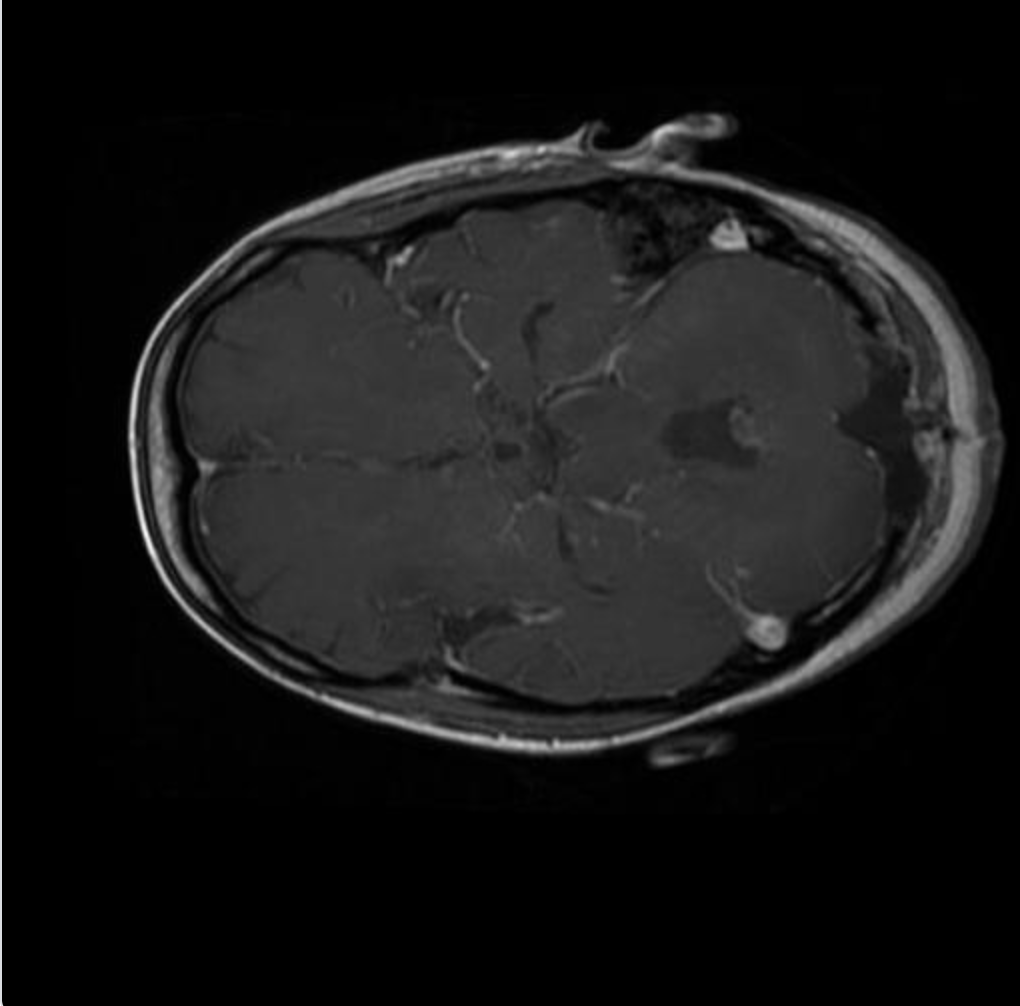

In [ ]:

# This part remains the same as before.

TISSUE_CLASSES = [
    'A: brain_glioma',
    'B: brain_menin',
    'C: brain_tumor',
]



options = "\\n".join(TISSUE_CLASSES)
PROMPT = f"After looking at the image carefully What is the most likely type of brain cancer shown in the MRI image? \n{options}. \nI also have a follow up question can you explain me what i have"

try:
    sample_image_path = '/content/newg.09.23 PM.png'
    sample_image = Image.open(sample_image_path).convert("RGB")
except FileNotFoundError:
    print(f"Error: The image file was not found at {sample_image_path}")
    print("Please make sure the image is uploaded to your Colab environment.")
    sample_image = Image.new('RGB', (224, 224), color = 'red')

messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": PROMPT},
        ],
    },
]

# --- Step 3: Run Inference ---
print("Running inference...")
outputs = pipe(
    text=messages,
    images=[sample_image],
    max_new_tokens=1024,
    do_sample=False,
    return_full_text=False,
)

# --- Step 4: View the Result ---
prediction = outputs[0]["generated_text"]

print("\\n--- Inference Result ---")
print(f"Model Prediction: {prediction}")

print("\\n--- Test Image ---")
display(sample_image)

##Example Output:

In [ ]:
\n--- Inference Result ---
Model Prediction: Most likely this image is a A:brain_glioma
Here are some helpful details, along with thoughtful suggestions for what you might consider next:
 ## Diagnostic Summary:

**Summary:**
The scan reveals a lesion located deep within the brain, which has features suggestive of a glioma.
The specific type of glioma is not yet certain, but the location provides a vital clue. Many gliomas, including some types of astrocytoma and oligodendroglioma, are found in the deep brain.
The next steps will be to get a more definitive diagnosis through a biopsy, which will tell us the exact cell type.

**Next Steps:**
* A plan to get a tissue sample for diagnosis.
* A review of the most common types of gliomas found in this location.
* A discussion of the prognosis for patients with gliomas in this part of the brain.

**Common Follow-up Questions:**
* What is the most important priority now?
* What is the most common type of glioma found in this part of the brain?

** Final thoughts:**
The location of the lesion gives your doctors a valuable starting point for diagnosis. They will now focus their investigation on the most likely possibilities in this specific area.
\n--- Test Image ---

In [ ]:
Model Prediction: Most likely this image is a C:brain_tumor
Here are some helpful details, along with thoughtful suggestions for what you might consider next:
 ## Diagnostic Summary:

**Summary:**
The scan shows a mass, which is a growth of cells, and swelling, which is the brain's natural reaction to the mass.
The mass is likely the cause of the swelling, and treating the mass will often lead to improvement in the swelling.

**Next Steps:**
* A plan to diagnose the mass.
* A discussion of treatments that can address both the mass and the swelling.

**Common Follow-up Questions:**
* What is the most likely cause of the mass?
* What is the fastest way to get relief from the swelling?

In [ ]:
Model Prediction: Most likely this image is a B:brain_menin
Here are some helpful details, along with thoughtful suggestions for what you might consider next:
 ## Diagnostic Summary:

**Summary:**
The scan performed for your unrelated issue revealed a small spot, which is a finding consistent with a meningioma.
A meningioma is a common, benign (not cancerous) tumor that grows from the lining of the brain. They are slow-growing and often cause no symptoms, so they are typically found by chance.

**Next Steps:**
* A plan to simply note the finding and not pursue any treatment.
* A discussion about whether to simply note the finding and not pursue any treatment.
* A plan to simply note the finding and not pursue any treatment.

**Common Follow-up Questions:**
* Is it likely to grow or cause any problems?
* Do I need any treatment now?

** Final thoughts:**
This is a very common incidental finding. The best course of action is often none at all, as the spot is likely to remain stable and not require any treatment. You can simply note its presence and not worry about it.
\n--- Test Image ---

In [ ]:
## Diagnostic Summary:

**Summary:**
The scan shows a subtle change in the brain's tissue, which could indicate an early form of glioma.
'Subtle change' is a very technical way of acknowledging that the difference is small, but it doesn't mean it's not there. It often means the change is in the very earliest, most treatable phase.

**Next Steps:**
* A plan for very close, infrequent monitoring.
* A discussion of whether any lifestyle restrictions (like very low-dose radiation) are necessary.
* A review of the absolute latest research on this type of change.

**Common Follow-up Questions:**
* What does it mean to have such a subtle change?
* What is the most important thing we need to watch for now?

** Final thoughts:**
This is a very reassuring signal. It means you are being vigilant and that the change is so small it requires a very careful, infrequent watch. You are being proactive and in control of a situation where you have the advantage of early discovery.

In [ ]:
\n--- Inference Result ---
Model Prediction: Most likely this image is a A:brain_glioma
Here are some helpful details, along with thoughtful suggestions for what you might consider next:
 ## Diagnostic Summary:

**Summary:**
The scan reveals a lesion in the brain consistent with a glioma.
The good news is that gliomas are a very treatable type of brain tumor, and there are many effective therapies available.

**Next Steps:**
* A discussion of the different treatment options, including surgery, radiation, chemotherapy, and clinical trials.
* A plan to get a tissue sample for diagnosis.
* Connecting with support services for you and your family.

**Common Follow-up Questions:**
* What is the most effective treatment for my type of glioma?
* What is the recovery process like after treatment?

** Final thoughts:**
This is a challenging diagnosis, but you are not alone. Your medical team will create a comprehensive plan to give you the best possible care and quality of life.

In [ ]:
import os
import json
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from peft import PeftModel
from huggingface_hub import snapshot_download




HF_MODEL_ID= 'google/medgemma-4b-it'
ADAPTER_MODEL_ID= "Manishram/medgemma-brain-cancer-finetuned"
MERGE_ADAPTER='true'


# Environment variables
MODEL_ID = os.environ.get("HF_MODEL_ID")  # Base model on HF Hub
ADAPTER_MODEL_ID = os.environ.get("ADAPTER_MODEL_ID")  # Adapter on HF Hub
MERGE_ADAPTER = os.environ.get("MERGE_ADAPTER", "false").lower() == "true"



def model_fn(model_dir):
    processor = AutoProcessor.from_pretrained(MODEL_ID)
    model = AutoModelForVision2Seq.from_pretrained(
        MODEL_ID,
        torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
        device_map="auto"
    )
    return {"model": model, "processor": processor}

def input_fn(request_body, content_type="application/json"):
    data = json.loads(request_body)
    return data

def predict_fn(data, model_objects):
    model = model_objects["model"]
    processor = model_objects["processor"]

    prompt = data.get("inputs", "")
    image_base64 = data.get("image")
    image_bytes = base64.b64decode(image_base64)
    image = Image.open(io.BytesIO(image_bytes)).convert("RGB")

    inputs = processor(text=prompt, images=image, return_tensors="pt").to(model.device)
    output_ids = model.generate(**inputs, max_new_tokens=128)
    return {"generated_text": processor.decode(output_ids[0], skip_special_tokens=True)}

def output_fn(prediction, accept="application/json"):
    return json.dumps(prediction), accept


In [ ]:
# Extra functions used:


# def collate_fn(data):
#   text =[]
#   imgs = []

#   for i in data:
#     imgs.append(i['image'])
#     text.append(processor.apply_chat_template(i['messages'], add_generation_prompt=False, tokenize=False).strip())
#   batch = processor(image = imgs, text = text, padding=True, return_tensors="pt")

#   # The labels are the input_ids, with the padding and image tokens masked in
#     # the loss computation
#   labels = batch["input_ids"].clone()

#   image_token_id = [
#         processor.tokenizer.convert_tokens_to_ids(
#             processor.tokenizer.special_tokens_map["boi_token"]
#         )
#     ]

#       # Mask tokens that are not used in the loss computation
#   labels[labels == processor.tokenizer.pad_token_id] = -100
#   labels[labels == image_token_id] = -100
#   labels[labels == 262144] = -100

#   batch["labels"] = labels
#   return batch




# more Test dataset made by LLM


In [ ]:
Test_df = {
  "brain_scan_explanations": [
    {
      "id": "glioma_01",
      "topic": "brain_glioma",
      "instruction": "Analyze my brain scan results for potential signs of a glioma. The finding seems relatively clear on the initial report.",
      "response": {
        "finding": "The analysis highlights an area within your brain tissue with features that are strongly suggestive of a growth known as a glioma.",
        "explanation_and_statistic": "A glioma is a type of growth that arises from the supportive cells of the brain, and it's important to remember that they can vary greatly. As a point of perspective, many types of gliomas are known to be slow-growing, and treatments have advanced significantly over the past decade.",
        "appointment_topics": {
          "heading": "Topics for your next appointment:",
          "items": [
            "A possible biopsy to determine the specific type of cells.",
            "Consultation with a specialized team, including a neuro-oncologist.",
            "An overview of potential treatment pathways."
          ]
        },
        "doctor_questions": {
          "heading": "Questions you could ask your doctor:",
          "items": [
            "Based on the scan, what are the most critical next steps for diagnosis?",
            "What does this finding potentially mean for my long-term health?"
          ]
        },
        "closing_statement": "Please know that this is the first step in a process. Your medical team is there to gather all the necessary information and guide you toward the best possible plan."
      }
    },
    {
      "id": "glioma_02",
      "topic": "brain_glioma",
      "instruction": "My scan report mentioned a possible glioma, but it was described as a 'subtle change.' Please explain.",
      "response": {
        "finding": "Your scan shows a subtle area of change within the brain tissue that could represent a type of growth known as a glioma.",
        "explanation_and_statistic": "This means there's a small spot that looks different from the surrounding tissue, and a glioma is one possible explanation. It's helpful to know that research into brain health is a very active field, leading to new and better ways to manage these types of findings.",
        "appointment_topics": {
          "heading": "Topics for your next appointment:",
          "items": [
            "The potential for more advanced or detailed imaging.",
            "A referral to a neuro-oncologist for a specialized opinion.",
            "Genetic testing, which can sometimes provide more information about the cells."
          ]
        },
        "doctor_questions": {
          "heading": "Questions you could ask your doctor:",
          "items": [
            "How certain can we be about this finding from this scan alone?",
            "What kind of monitoring will I need moving forward?"
          ]
        },
        "closing_statement": "Discovering a subtle change like this allows you and your doctor to be proactive. You are in a good position to gather more information and make a thoughtful plan together."
      }
    },
    {
      "id": "glioma_03",
      "topic": "brain_glioma",
      "instruction": "Explain this finding to me. The report says 'possible glioma' and mentions its location is deep.",
      "response": {
        "finding": "The scan analysis has identified a growth located deeper within the brain that has several characteristics of a glioma.",
        "explanation_and_statistic": "A glioma is a growth that comes from the glial cells, which normally support and protect the brain's neurons. While any brain-related finding can feel concerning, it's worth noting that every case is unique, and a person's overall health and the specific tumor characteristics play a big role in their outlook.",
        "appointment_topics": {
          "heading": "Topics for your next appointment:",
          "items": [
            "How the location might influence treatment options.",
            "A discussion about the potential benefits of surgery, radiation, or chemotherapy.",
            "A comprehensive evaluation by a neurosurgeon."
          ]
        },
        "doctor_questions": {
          "heading": "Questions you could ask your doctor:",
          "items": [
            "How will the location of this area affect my options?",
            "What kind of support services, like counseling or patient groups, are available to me?"
          ]
        },
        "closing_statement": "This information is a starting point. Your healthcare team will work closely with you to navigate the next steps with care and expertise. You are not alone in this."
      }
    },
    {
      "id": "meningioma_01",
      "topic": "brain_meningioma",
      "instruction": "The results of my brain scan are in. Can you explain the finding that is consistent with a meningioma?",
      "response": {
        "finding": "The scan reveals a well-defined growth attached to the outer lining of your brain, which is a classic appearance for a meningioma.",
        "explanation_and_statistic": "A meningioma is a growth that develops from the meninges, the protective layers that cover the brain and spinal cord. To give you some context, the vast majority of these—more than 85%—are categorized as benign, meaning they are not cancerous.",
        "appointment_topics": {
          "heading": "Topics for your next appointment:",
          "items": [
            "An observation or 'watch and wait' approach.",
            "The option of surgical removal.",
            "The possibility of using focused radiation therapy."
          ]
        },
        "doctor_questions": {
          "heading": "Questions you could ask your doctor:",
          "items": [
            "Given its appearance, is this likely to be slow-growing?",
            "What are the risks and benefits of immediate treatment versus observation?"
          ]
        },
        "closing_statement": "This is a very common type of finding, and your doctor will have a great deal of experience in creating a plan that is right for you. Take a deep breath; you have time to consider your options."
      }
    },
    {
      "id": "meningioma_02",
      "topic": "brain_meningioma",
      "instruction": "I had a brain scan for an unrelated issue, and they found a 'small spot' that they think is a meningioma. What does this mean?",
      "response": {
        "finding": "Our analysis detected a very small spot on the protective covering of your brain which has the appearance of a meningioma.",
        "explanation_and_statistic": "This is a type of growth that comes from the brain's outer lining, not the brain tissue itself. It may be helpful to know that meningiomas are the most frequently reported primary brain tumor, and they are often found by chance on scans done for other reasons.",
        "appointment_topics": {
          "heading": "Topics for your next appointment:",
          "items": [
            "A plan for monitoring the area with future scans.",
            "A list of potential (but unlikely) symptoms to watch for.",
            "A referral to a neurosurgeon, even if just for an initial opinion and reassurance."
          ]
        },
        "doctor_questions": {
          "heading": "Questions you could ask your doctor:",
          "items": [
            "What is the likelihood that this will ever need treatment?",
            "Are there any lifestyle changes or restrictions I should consider?"
          ]
        },
        "closing_statement": "Finding this early gives you a significant advantage. You and your care team have the opportunity to monitor it closely and act only if it becomes necessary."
      }
    },
    {
      "id": "meningioma_03",
      "topic": "brain_meningioma",
      "instruction": "My scan results mention 'a few small areas' that look like meningiomas. Please explain.",
      "response": {
        "finding": "The analysis shows a few small areas of growth on the brain's surface that are characteristic of meningiomas.",
        "explanation_and_statistic": "These are growths that arise from the meninges, the brain's protective covering, and are typically slow-growing. It is not unusual for people to live with these for many years without them causing any symptoms or requiring any treatment.",
        "appointment_topics": {
          "heading": "Topics for your next appointment:",
          "items": [
            "The reasoning behind a 'watchful waiting' approach.",
            "Whether there could be any underlying genetic factors.",
            "How to manage any potential symptoms, should they ever arise."
          ]
        },
        "doctor_questions": {
          "heading": "Questions you could ask your doctor:",
          "items": [
            "Does having more than one of these change the approach to management?",
            "How often will I need to have follow-up scans?"
          ]
        },
        "closing_statement": "Having this clear picture of your health is a positive step. Your medical team will help you establish a simple, routine monitoring plan to ensure your continued well-being."
      }
    },
    {
      "id": "brain_tumor_01",
      "topic": "brain_tumor",
      "instruction": "I need help understanding my brain scan results. The doctor said there is an 'abnormal tissue' that needs a closer look.",
      "response": {
        "finding": "The scan has identified an area of abnormal tissue in your brain that will require further investigation by your medical team.",
        "explanation_and_statistic": "'Abnormal tissue' is a general term for a collection of cells that look different from the area around them; the next step is to find out exactly what kind of cells they are. It’s important to know that many types of brain growths are very treatable, especially when identified early.",
        "appointment_topics": {
          "heading": "Topics for your next appointment:",
          "items": [
            "Additional specialized imaging, such as an MRI with contrast.",
            "The possibility of a biopsy to get a definitive diagnosis.",
            "A consultation with a neurology or neurosurgery team."
          ]
        },
        "doctor_questions": {
          "heading": "Questions you could ask your doctor:",
          "items": [
            "What are the most important next steps to understand what this is?",
            "Which type of specialist is the most appropriate for me to see next?"
          ]
        },
        "closing_statement": "This first finding is a crucial piece of information. It's the starting point from which your doctors can build a clear and effective plan. You have a team ready to support you."
      }
    },
    {
      "id": "brain_tumor_02",
      "topic": "brain_tumor",
      "instruction": "My brain scan report uses the words 'mass' and 'swelling.' Can you explain this to me in simple terms?",
      "response": {
        "finding": "Your scan shows a mass within the brain surrounded by an area of swelling, which is a key finding your doctor will want to discuss with you in detail.",
        "explanation_and_statistic": "A 'mass' is a growth of cells, and the 'swelling' (also called edema) is a common reaction of the surrounding brain tissue. Importantly, effective treatments exist to manage both the growth itself and the swelling, which can often lead to a quick improvement in symptoms.",
        "appointment_topics": {
          "heading": "Topics for your next appointment:",
          "items": [
            "The use of specific medications, like steroids, to reduce the swelling.",
            "The plan for further tests to determine the exact nature of the mass.",
            "The different approaches for treatment or removal of the mass."
          ]
        },
        "doctor_questions": {
          "heading": "Questions you could ask your doctor:",
          "items": [
            "What can be done right now to manage the swelling and any symptoms it is causing?",
            "What is the timeline for the next steps in my diagnosis and care?"
          ]
        },
        "closing_statement": "Seeing these details on a scan allows your doctors to act quickly. They can address the symptoms from the swelling while they work to understand the mass itself. You are in good hands."
      }
    },
    {
      "id": "brain_tumor_03",
      "topic": "brain_tumor",
      "instruction": "I've been told my brain scan shows a 'subtle, less-defined area of concern.' I'm not sure what to make of that.",
      "response": {
        "finding": "The analysis points to a subtle, less-defined area of concern in your brain that does not look like typical brain tissue.",
        "explanation_and_statistic": "This means the scan has picked up on a very early or small change that doesn't have clear borders yet, and close follow-up is the standard way to handle it. Advances in imaging now allow us to see these subtle things earlier than ever, which gives you and your doctor the benefit of time.",
        "appointment_topics": {
          "heading": "Topics for your next appointment:",
          "items": [
            "Scheduling a follow-up scan in a few weeks or months to check for any changes.",
            "A detailed review of your overall health and any symptoms you may be experiencing.",
            "A referral to a neurologist for their expert opinion on the scan."
          ]
        },
        "doctor_questions": {
          "heading": "Questions you could ask your doctor:",
          "items": [
            "Is it possible that this could be something other than a tumor, like an effect of a past injury or inflammation?",
            "Are there any specific signs or symptoms I should be aware of while we monitor this?"
          ]
        },
        "closing_statement": "It's completely understandable that an uncertain finding can be unsettling, but this 'watch and wait' approach is a very safe and common practice. It allows your doctor to be cautious and thorough. Be gentle with yourself as you move through this process."
      }
    }
  ]
}